In [77]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [150]:
df = pd.read_csv('data')

In [151]:
c = ['Mapped Agent 13M Persistency', 'Applicant\'s Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income',
       'Applicant\'s Policy Risk Cessation Term',
       'Applicant\'s Policy Sum Assured']

## Outlier Detection Algorithms

In [152]:
# percentile based outlier detection

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return list(((data < minval) | (data > maxval)))


In [153]:
# inter quertile(IQR) range based outlier detection

def outliers_iqr(data):
        quartile_1, quartile_3 = np.percentile(data, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        return (data > upper_bound) | (data < lower_bound)

In [154]:
# mad based outlier

def mad_based_outlier(data, threshold=3.5):
    mean_y = np.mean(data)
    mean_absolute_deviation_y = np.mean([np.abs(y - mean_y) for y in data])
    modified_z_scores = [0.6745 * (y - mean_y) / mean_absolute_deviation_y
                         for y in data]

    return np.abs(modified_z_scores) > threshold

In [155]:
# Std deviation based outlier detection

def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if abs((val-mean)/std) > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [156]:
# Combination of outlier detecting algorithms

def outlierVote(data):
    w = np.array(percentile_based_outlier(data))
    x = np.array(outliers_iqr(data))
    y = np.array(mad_based_outlier(data))
    z = np.array(std_div(data))
    temp = zip([w,x, y, z])
    dff = pd.DataFrame({'percentile_based':w,'iqr':x,'mad_based':y,'std_div':z}) 
    dff['percentile_based'] = dff['percentile_based'].apply(int)
    dff['iqr'] = dff['iqr'].apply(int)
    dff['mad_based'] = dff['mad_based'].apply(int)
    dff['std_div'] = dff['std_div'].apply(int)
    final = []
    final = dff.T.apply(lambda x:1 if (x.sum() >= 3) else 0 , axis = 0)
    return final.map({1:True, 0:False})

In [157]:
len(np.array(df['Mapped Agent 13M Persistency']))

25320

In [158]:
np.array(df['Mapped Agent 13M Persistency'])

array([93.47, 81.59, 87.58, ..., 80.18, 80.18, 62.58])

In [159]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=5)
    
    for ax, func in zip(axes, [percentile_based_outlier, outliers_iqr, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)  # text properties
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('Inter-quartile range Outliers', **kwargs)
    axes[2].set_title('MAD-based Outliers', **kwargs)
    axes[3].set_title('STD-based Outliers', **kwargs)
    axes[4].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,12)

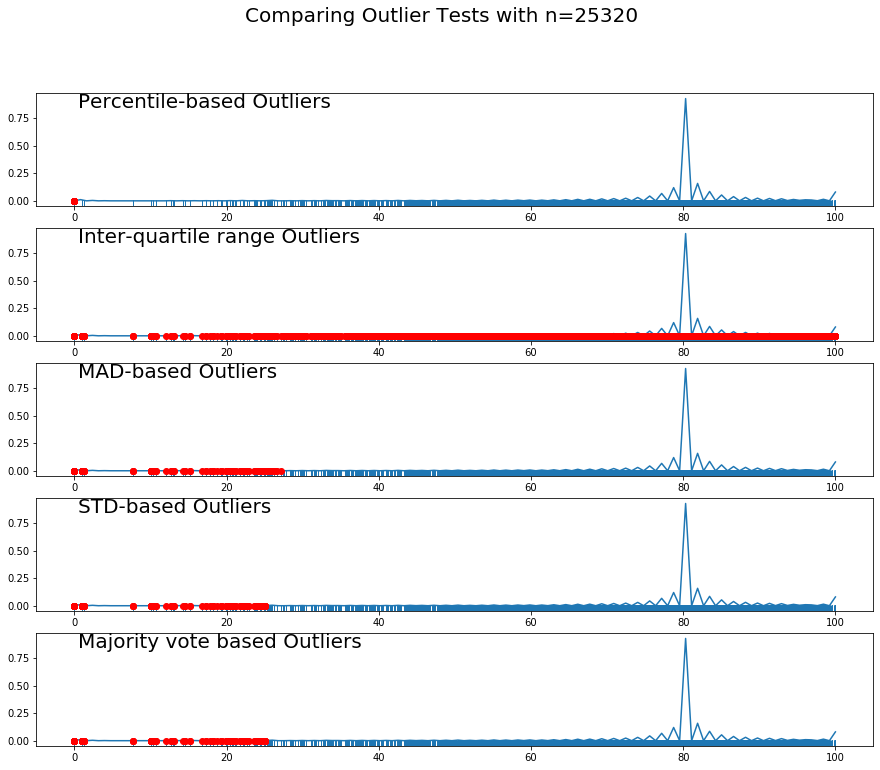

In [89]:
plotOutlier(np.array(df['Mapped Agent 13M Persistency']))

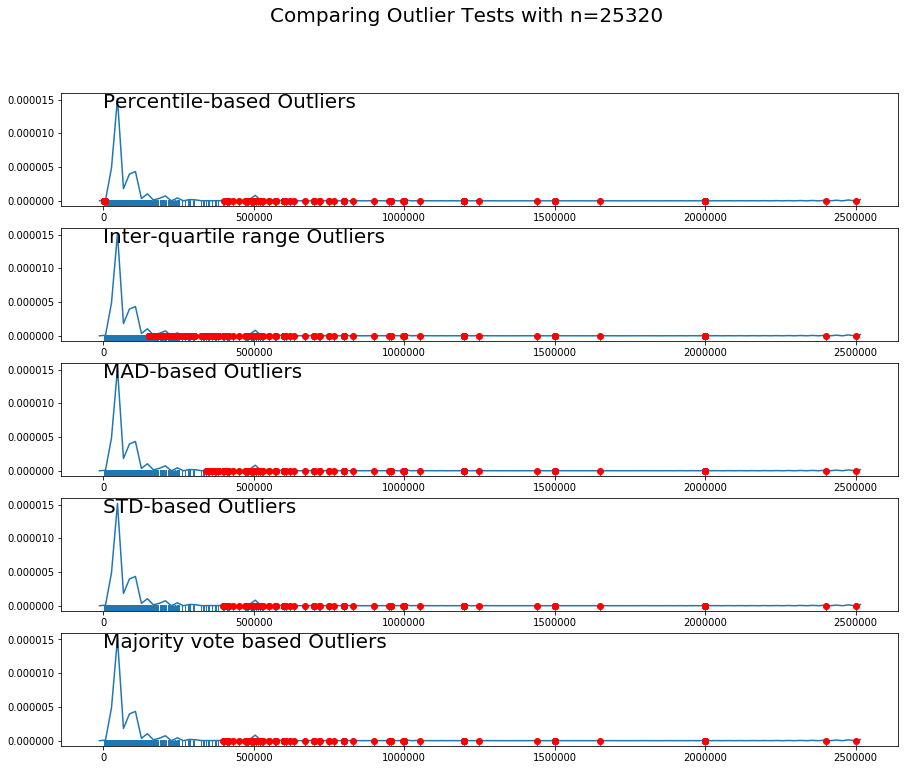

In [90]:
plotOutlier(np.array(df['Applicant\'s Policy Annualized Premium']))

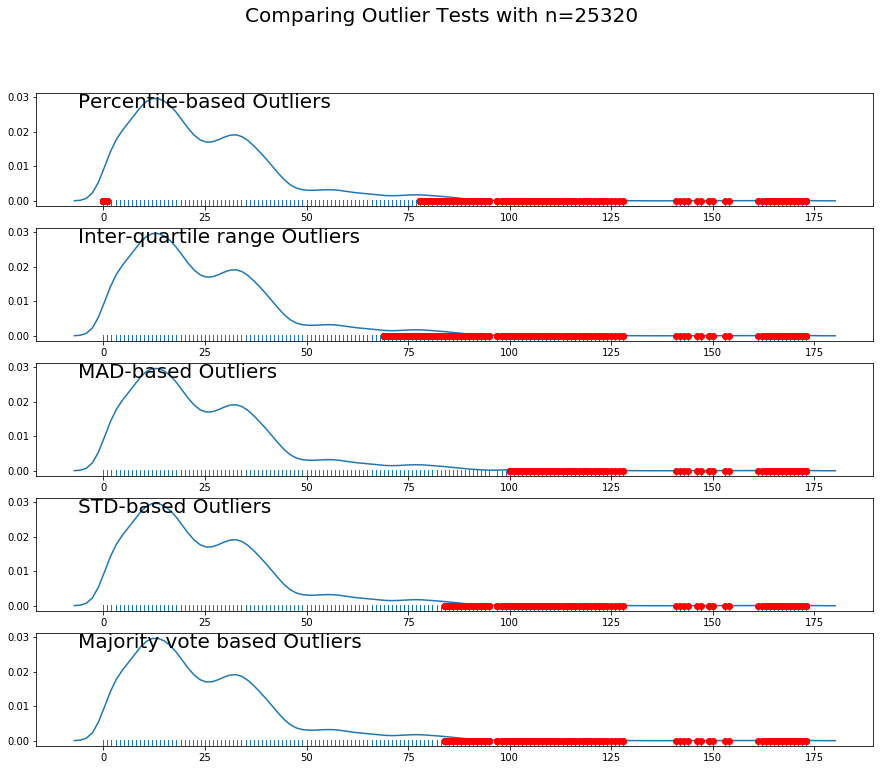

In [91]:
plotOutlier(np.array(df['Mapped Agent Vintage']))

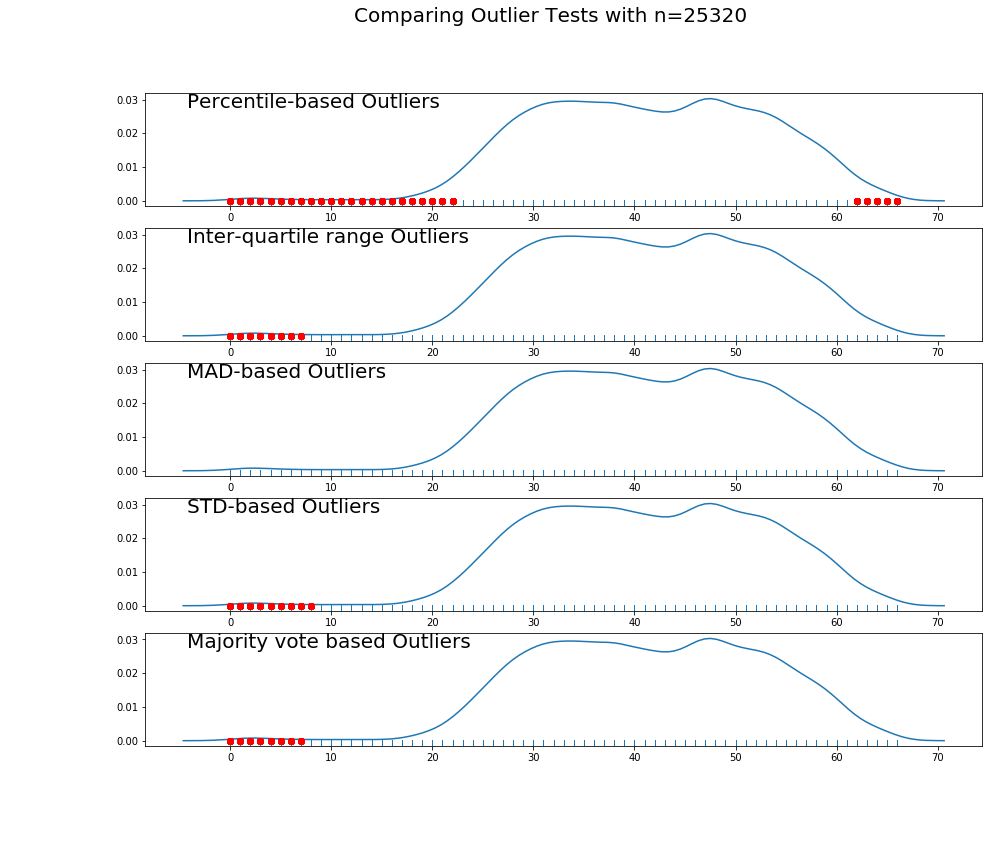

In [92]:
plotOutlier(np.array(df['Application  Life Assured Age']))

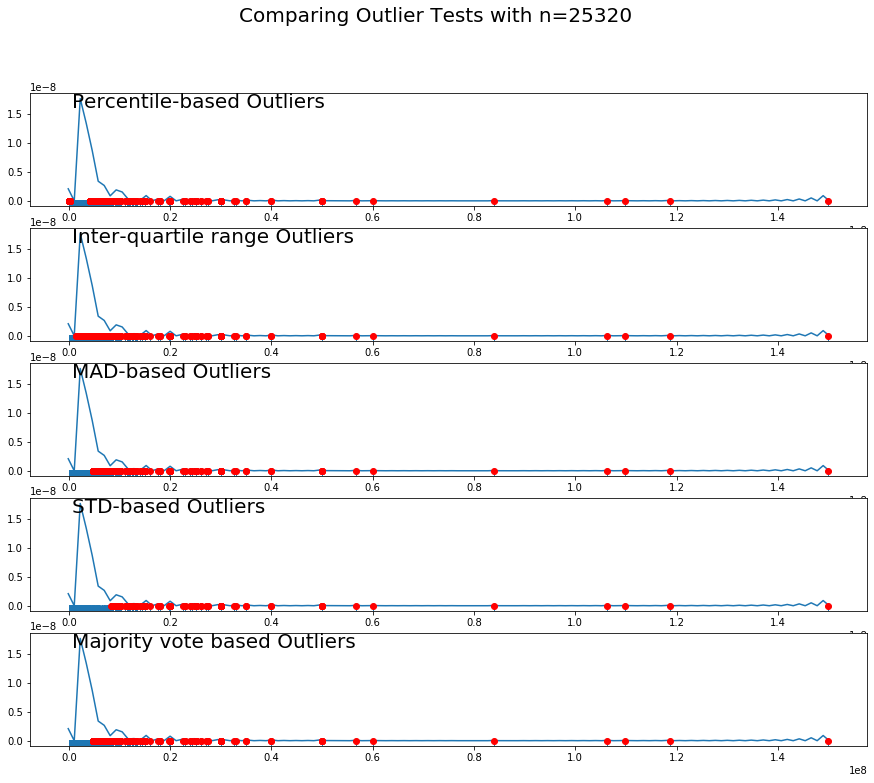

In [93]:
plotOutlier(np.array(df['Application  Life Assured Income']))

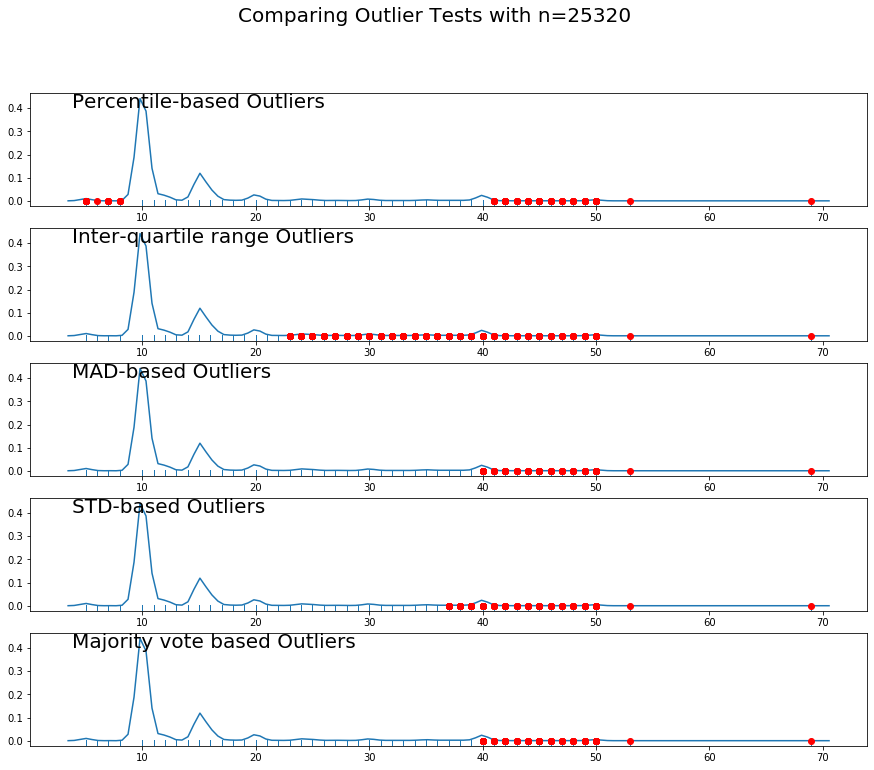

In [94]:
plotOutlier(np.array(df['Applicant\'s Policy Risk Cessation Term']))

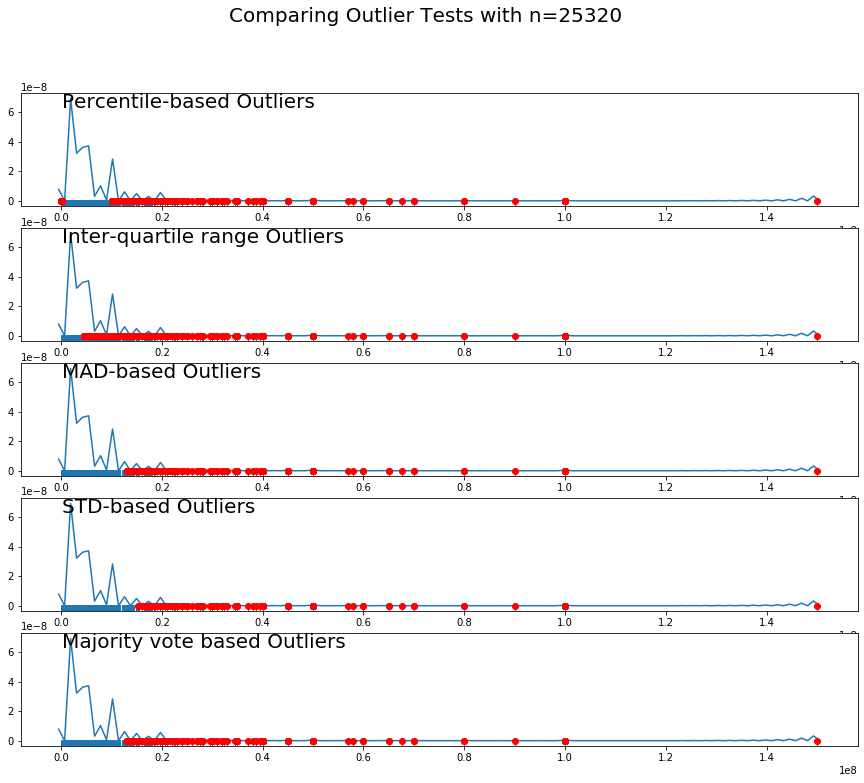

In [95]:
plotOutlier(np.array(df['Applicant\'s Policy Sum Assured']))

# Handling outliers for continuous columns

In [160]:
#1
x = df['Mapped Agent 13M Persistency'][outlierVote(np.array(df['Mapped Agent 13M Persistency'])) == True].max()
x

25.0

In [161]:
df['Mapped Agent 13M Persistency'][df['Mapped Agent 13M Persistency'] < x] = x

In [162]:
#2
df['Applicant\'s Policy Annualized Premium'][outlierVote(np.array(df['Applicant\'s Policy Annualized Premium'])) == True].max()

2500000.0

In [163]:
x = df['Applicant\'s Policy Annualized Premium'][outlierVote(np.array(df['Applicant\'s Policy Annualized Premium'])) == True].min()

In [164]:
x

398120.0

In [165]:
df['Applicant\'s Policy Annualized Premium'][df['Applicant\'s Policy Annualized Premium'] > x] = x

In [166]:
#3
x = df['Mapped Agent Vintage'][outlierVote(np.array(df['Mapped Agent Vintage'])) == True].min()
x

84.0

In [167]:
df['Mapped Agent Vintage'][df['Mapped Agent Vintage'] > x] = x

In [168]:
#4
x = df['Application  Life Assured Age'][outlierVote(df['Application  Life Assured Age'])].max()
x

7.0

In [169]:
df['Application  Life Assured Age'][df['Application  Life Assured Age'] < x] = x

In [170]:
#5
x = df['Application  Life Assured Income'][std_div(df['Application  Life Assured Income'],threshold=3)].min()
x

8400000.0

In [171]:
df['Application  Life Assured Income'][df['Application  Life Assured Income'] > 20000000] = 20000000

In [172]:
#6
x = df['Applicant\'s Policy Risk Cessation Term'][outlierVote(np.array(df['Applicant\'s Policy Risk Cessation Term'])) == True].min()
x

40

In [173]:
df['Applicant\'s Policy Risk Cessation Term'].min()

5

In [174]:
df['Applicant\'s Policy Risk Cessation Term'][df['Applicant\'s Policy Risk Cessation Term'] > x] = x

In [175]:
#7
x = df['Applicant\'s Policy Sum Assured'][outlierVote(np.array(df['Applicant\'s Policy Sum Assured'])) == True].min()
x

13000000

In [176]:
df['Applicant\'s Policy Sum Assured'][df['Applicant\'s Policy Sum Assured'] > x] = x

# Handling Categorical Variables

In [177]:
y = df['Application Specific Sourcing Partner'].value_counts() < 50

In [178]:
y.index

Index(['HDFC BANK', 'HDFC Sales Private Limited', 'HDFC SECURITIES LIMITED',
       'RBL Bank Ltd', 'DUMMY HDFC BANK UPSELL',
       'Equitas Small Finance Bank Ltd', 'IDFC First Bank Limited',
       'BAJAJ FINANCE LIMITED', 'Bajaj Capital Insurance Brokin',
       'THE SARASWAT CO-OPERATIVE BANK',
       ...
       'SPA Insurance Broking Services', 'AKSHAYA WEALTH MANAGEMENT PVT.',
       'VENNELA FIN MART PVT LTD', 'Bluebells Insurance Broking Pr',
       'PURPLE POND INSURANCE BROKERS', 'Goldkey Insurance Brokers Pvt.',
       'SecureNow Insurance Broker Pri', 'PIONEER ASSURANCE CONSULTANTS',
       'Security Insurance Brokers (In', 'Dummy SLG Banca Alliance'],
      dtype='object', length=126)

In [179]:
df['Application Specific Sourcing Partner']

0                             HDFC BANK
1                             HDFC BANK
2            HDFC Sales Private Limited
3                             HDFC BANK
4                             HDFC BANK
5            HDFC Sales Private Limited
6        Mercury Insurance Brokers Pvt.
7                             HDFC BANK
8                             HDFC BANK
9                             HDFC BANK
10        PEACE WORTH INSURANCE BROKERS
11                            HDFC BANK
12               DUMMY HDFC BANK UPSELL
13                       SLG NBFC MFI 1
14           HDFC Sales Private Limited
15       ONE SERVE CAPITAL ADVISORY LLP
16                            HDFC BANK
17       NJ Insurance Brokers Private L
18                            HDFC BANK
19                            HDFC BANK
20                            HDFC BANK
21                            HDFC BANK
22                            HDFC BANK
23                            HDFC BANK
24                            HDFC BANK


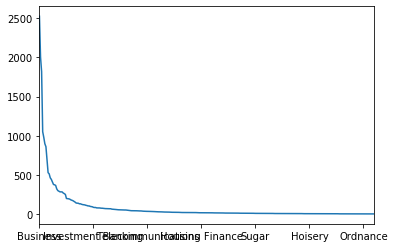

In [180]:
df['Application  Life Assured Industry'].value_counts().plot()

In [181]:
df[['Mapped Agent Branch ', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Auto Debit of Premium Opted Flag(Yes/No),Application Sourcing Channel,Application Life Assured City,Applicant's Policy Contract Branch,Application Life Assured Education,Application Life Assured City Tier,Application Life Assured Gender,Application Life Assured Industry,...,First Premium Payment Type,Applicant's Policy Product Category,Applicant's Policy Premium Payment Frequency,Applicant's Policy Product Name,Application Login Date,Application Life Assured Residential Status,Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,HDFC Life Operational Zone
0,Delhi - Asaf Ali Road,N,Y,HDFC BANK,bangalore,Delhi - Nehru Place,Graduation,Tier I,Female,Trading,...,"ECS,SI",Protection,Annual,HDFC Life Click 2 Protect 3D+,07/07/18,Resident Indian,N,Karnataka,HDFC BANK,North 1
1,Ahmedabad Vastrapur Branch,N,N,HDFC BANK,Navsari,Ahmedabad - Vastrapur,S S C,Tier III,Male,Building Materials,...,Online Credit/Debit Card/Teles Sales,Savings,Annual,HDFC Life Super Income Plan,31/03/18,Resident Indian,N,Gujarat,HDFC BANK,West
2,Jaipur-Tonk Road,N,Y,Ex-HDFC,jaipur,Jaipur-Tonk Road,B A,Tier II,Male,Service,...,Cheque,Investment,Monthly Premium,HDFC SL ProGrowth - Flexi,09/06/18,Resident Indian,N,Rajasthan,HDFC Sales,North 2
3,Jaipur-Tonk Road,N,Y,HDFC BANK,Jaipur,Mumbai - Bkc,Post Graduation,Tier II,Male,Teaching,...,DD,Investment,Monthly Premium,HDFC Life ProGrowth Plus,21/02/18,Resident Indian,N,Rajasthan,HDFC BANK,North 2
4,Bhavnagar - Patni Plaza,N,Y,HDFC BANK,botad,Bhavnagar - Patni Plaza,S S C,Tier III,Male,Labour,...,"ECS,SI",Childrens Plan,Annual,HDFC YOUNGSTAR SUPER PREMIUM,06/06/18,Resident Indian,N,Gujarat,HDFC BANK,West
5,Pune City Mall,N,Y,Ex-HDFC,Pune,Pune - Nandadeep Fc Road,B E,Tier I,Male,Engineering,...,DD,Investment,Annual,HDFC SL ProGrowth - Flexi,03/01/18,Resident Indian,N,Maharashtra,HDFC Sales,West
6,Delhi - Mayur Vihar,N,N,Brokers & Small CA,Singrauli,Delhi - Mayur Vihar,S S C,Tier III,Male,Civil,...,Cheque,Savings,Annual,HDFC Life ClassicAssure Plus,02/06/18,Resident Indian,N,Madhya Pradesh,Brokers,North 1
7,Chennai - T Nagar,N,Y,HDFC BANK,chennai,Chennai - T. Nagar,Graduation,Tier I,Female,Medical,...,DD,Investment,Annual,HDFC SL ProGrowth - Flexi,10/03/18,Resident Indian,N,Tamil Nadu,HDFC BANK,South 1
8,Chengannur Branch,N,N,HDFC BANK,Mavelikara,Kayamkulam - Karukayil Complex,MBBS,Tier III,Male,Medical,...,"ECS,SI",Investment,Annual,HDFC Life ProGrowth Plus,02/03/18,Resident Indian,N,Kerala,HDFC BANK,South 2
9,Ludhiana - Feroze Gandhi Mrkt,N,Y,HDFC BANK,ludhiana,Ludhiana - Feroze Gandhi Mrkt,B A,Tier II,Female,Sales,...,DD,Investment,Annual,HDFC Life ProGrowth Plus,15/05/18,Resident Indian,N,Punjab,HDFC BANK,North 1


In [182]:
df['Applicant\'s  Policy Contract Branch'].value_counts()

Chennai - T. Nagar               1158
Delhi - Mayur Vihar               797
Mumbai - Bkc                      732
Pune - Nandadeep Fc Road          701
Delhi - Paschim Vihar             627
Kolkata - Menaka Estate           586
Ahmedabad - Vastrapur             552
Hyderabad - Begumpet              551
Chandigarh - Sec 43               533
Jaipur-Tonk Road                  492
Gurgaon Mg Road 08-09 Sec15       474
Bangalore - M.G. Road             390
Delhi - Nehru Place               390
Indore - Vijay Nagar              332
Mumbai - Borivali                 321
Lucknow - Hazratganj              314
Ludhiana - Feroze Gandhi Mrkt     300
Vadodara - Karelibaug             288
Surat - City Light                261
Raipur - Pachpedi Naka            241
Nasik - City Plaza                226
Mumbai - Kalyan                   219
Jalandhar - Shoppers Square       214
Vapi - Daman Road                 208
Kanpur - Js Tower                 205
Guwahati-Amaze Shopping Mall      203
Bhatinda - N

In [183]:
df['Mapped Agent Branch '].value_counts()

Chennai - T Nagar                 1157
Delhi - Mayur Vihar                816
Pune City Mall                     730
Ahmedabad Vastrapur Branch         577
Hyderabad - Begumpet               569
Delhi - Paschim Vihar              560
Chandigarh - Sec 43                552
Kolkata - Menaka Estate            534
Jaipur-Tonk Road                   529
Delhi - Nehru Place                468
Gurgaon - Sec - 15                 444
Bangalore - M.G. Road              357
Mumbai - Borivali                  350
Chennai - Annanagar                346
Indore - Vijay Nagar               343
Lucknow - Hazratganj               338
Vadodara - Kalaghoda               305
Ludhiana - Feroze Gandhi Mrkt      303
Surat - City Light                 293
Nasik - City Plaza                 240
Jalandhar - Shoppers Square        233
Raipur - Pachpedi Naka             229
Kanpur - Swaroop Nagar             217
Guwahati - Amaze Shopping Mall     207
Mumbai - Kalyan                    206
Vapi - Daman Road        

In [184]:
df['Application  Life Assured Education'].value_counts()

Graduation                                4737
B A                                       4126
S S C                                     2132
H S C                                     2045
B Com                                     1909
Under Matric (Class l to lX)              1426
Post Graduation                           1194
MBA                                       1058
B E                                        864
B Sc                                       677
M A                                        646
B Tech                                     591
M Sc                                       385
MBBS                                       382
Others                                     355
B Ed                                       336
Diploma                                    281
MCA                                        197
CA                                         153
ITI                                        149
Ph.D.                                      142
M Tech       

In [185]:
df['Application Login Date'].value_counts()

31/03/18    245
29/03/18    238
26/03/18    185
21/03/18    179
27/03/18    175
30/01/18    175
31/12/18    167
28/02/18    165
19/03/18    160
30/03/18    154
24/01/18    153
28/03/18    148
31/01/18    146
22/03/18    143
26/02/18    142
14/03/18    136
20/03/18    134
15/03/18    133
19/01/18    131
22/01/18    131
01/08/18    131
23/01/18    129
17/01/18    127
28/12/18    126
27/02/18    126
29/11/18    124
29/12/18    124
16/03/18    124
31/08/18    123
03/12/18    123
           ... 
14/10/18      2
16/11/17      2
15/11/17      2
15/08/18      2
27/05/18      2
14/11/17      2
15/04/18      2
10/07/18      2
11/10/17      2
30/10/17      2
22/07/18      2
11/11/17      1
08/05/18      1
02/04/19      1
12/05/17      1
24/12/17      1
04/08/18      1
11/09/17      1
17/11/17      1
25/10/17      1
26/08/18      1
12/10/17      1
27/10/17      1
12/09/17      1
25/11/17      1
11/01/17      1
04/01/18      1
06/03/18      1
17/12/17      1
24/11/17      1
Name: Application Login 

In [186]:
df['Application  Life Assured Nationality'].value_counts()  # all values are same

Indian    25320
Name: Application  Life Assured Nationality, dtype: int64

In [187]:
df['Application  Life Assured Occupation'].value_counts()

Salaried                   11605
Self employed/ Business    11379
Agriculture                 1617
Others                       690
Student                       25
Unemployed                     3
Housewife                      1
Name: Application  Life Assured Occupation, dtype: int64

In [188]:
df['Applicant\'s Policy PAR/NON PAR/ULIP Tag'].value_counts()

UL         18366
Par         3696
Non Par     3258
Name: Applicant's Policy PAR/NON PAR/ULIP Tag, dtype: int64

In [189]:
df['First Premium Payment Type'].value_counts()

DD                                      9144
Cheque                                  7711
Online Credit/Debit Card/Teles Sales    3065
ECS,SI                                  3001
Online Netbanking                       1352
Online-Bill                              537
Journal Entry                            307
Credit Card Mandate                      190
Cash                                      13
Name: First Premium Payment Type, dtype: int64

In [190]:
df['Applicant\'s Policy Product Category'].value_counts()

Investment        17592
Savings            4406
Protection         2656
Childrens Plan      666
Name: Applicant's Policy Product Category, dtype: int64

In [191]:
df['Applicant\'s Policy Premium Payment Frequency'].value_counts()

Annual                23165
Monthly Premium        1225
Halfyearly Premium      813
Quarterly Premium       117
Name: Applicant's Policy Premium Payment Frequency, dtype: int64

In [192]:
df['Application Life Assured Residential Status'].value_counts()

Resident Indian    25308
NRI                   12
Name: Application Life Assured Residential Status, dtype: int64

In [193]:
df['Application Life Assured Smoker Declaration'].value_counts()

N    25111
Y      209
Name: Application Life Assured Smoker Declaration, dtype: int64

In [194]:
df['Application Life Assured State'].value_counts()

Maharashtra                  4115
Gujarat                      2561
Uttar Pradesh                2173
Punjab                       2145
Tamil Nadu                   1866
Delhi                        1725
Haryana                      1667
Rajasthan                    1281
Madhya Pradesh               1007
West Bengal                   971
Karnataka                     968
Kerala                        635
Telangana                     574
Chattisgarh                   448
Bihar                         446
Andhra Pradesh                420
Jharkhand                     402
Assam                         378
Odisha                        377
Uttarakhand                   288
Himachal Pradesh              225
Jammu & Kashmir               179
Chandigarh                    130
Goa                            96
Dadra & Nagar Haveli           61
Daman & Diu                    37
Pondicherry                    33
Tripura                        32
Meghalaya                      28
Sikkim        

In [195]:
df['Application Sourcing Sub Channel'].value_counts()

HDFC BANK                    16516
HDFC Sales                    3302
Brokers                       1367
HDFC Sec                       890
Ratnakar Bank                  809
HDFC BANK Upsell               656
Small CA                       401
NBFC & MFI - 1 Others          342
IDFC Bank                      266
Bajaj Fin Serv                 183
Saraswat Bank                  122
India Bulls                     86
Ujjvan SFB                      62
NBFC MFI 1 Upsell               54
Basin Catholic                  34
Chola                           28
IMF                             24
PSU Cooperative-Others          23
CSB                             22
PSU                             22
Suryoday SFB                    20
Apna Sahakari                   18
Vakrangee                       16
Other Banks and CA Upsell       14
Utkarsh SFB                     13
DNSB                             9
Vishweshwar Sahakari             7
Ex-HDFC Upsell                   7
E Sahaj             

In [196]:
df['HDFC Life Operational Zone'].value_counts()

West       6862
North 1    6826
East       4021
North 2    3070
South 1    2985
South 2    1556
Name: HDFC Life Operational Zone, dtype: int64

In [199]:
df['Application Login Date']

0        07/07/18
1        31/03/18
2        09/06/18
3        21/02/18
4        06/06/18
5        03/01/18
6        02/06/18
7        10/03/18
8        02/03/18
9        15/05/18
10       08/08/18
11       01/05/18
12       03/06/18
13       27/09/18
14       01/08/18
15       11/12/18
16       26/01/19
17       14/05/18
18       26/02/18
19       28/06/18
20       07/10/18
21       23/01/18
22       22/10/18
23       02/03/18
24       29/10/18
25       21/03/18
26       29/03/18
27       09/04/18
28       18/12/17
29       27/12/18
           ...   
25290    29/01/18
25291    09/06/18
25292    26/02/18
25293    22/06/18
25294    20/04/18
25295    22/01/18
25296    06/11/18
25297    18/12/17
25298    25/01/18
25299    16/08/18
25300    30/08/18
25301    27/11/18
25302    27/03/18
25303    06/04/18
25304    29/12/17
25305    06/07/18
25306    13/03/18
25307    01/10/18
25308    30/11/18
25309    16/01/18
25310    12/04/18
25311    16/03/18
25312    17/11/18
25313    20/07/18
25314    2

In [200]:
df['Application Login year'] = df['Application Login Date'].apply(lambda x: x.split('/')[2])

In [201]:
df['Application Login year'].value_counts()

18    23022
19     1771
17      527
Name: Application Login year, dtype: int64

In [202]:
df['Application Login month'] = df['Application Login Date'].apply(lambda x: x.split('/')[1])

In [203]:
df['Application Login month'].value_counts()

03    3209
01    3205
12    2868
09    1986
11    1977
06    1916
08    1880
02    1875
05    1721
07    1710
10    1638
04    1335
Name: Application Login month, dtype: int64

In [204]:
df['Application Login day'] = df['Application Login Date'].apply(lambda x: x.split('/')[0])

In [205]:
df['Application Login day'].value_counts()

01    1632
29    1259
30    1187
28    1155
31    1021
19     972
27     961
20     955
21     945
26     922
24     894
22     870
17     846
23     841
03     831
16     814
18     798
02     793
15     788
14     765
13     747
25     720
12     660
09     608
07     602
10     527
06     519
05     516
08     499
04     347
11     326
Name: Application Login day, dtype: int64

In [206]:
df.drop('Application Login Date', axis =1, inplace = True)

In [207]:
df['Mapped Agent city'] = df['Mapped Agent Branch '].apply(lambda x: x.split(' ')[0])

In [208]:
df['Mapped Agent city'] =df['Mapped Agent city'].apply(lambda x: x.split('-')[0])

In [209]:
df['Mapped Agent city'].value_counts()

Delhi             2462
Mumbai            1877
Chennai           1511
Pune               872
Kolkata            802
Ahmedabad          642
Bangalore          600
Hyderabad          578
Chandigarh         552
Jaipur             550
Gurgaon            444
Surat              398
Indore             367
Lucknow            354
Vadodara           326
Ludhiana           303
Nasik              240
Jalandhar          233
Raipur             229
Kanpur             217
Guwahati           207
Vapi               204
Amritsar           203
Bhatinda           198
Varanasi           184
Noida              176
Patna              172
Coimbatore         172
Rajkot             169
Ghaziabad          166
                  ... 
Raigunj              2
Bhimavaram           2
Basti                2
Namakkal             2
Irinjalakuda         2
Nalgonda             2
Puttur               2
Angamaly             2
Nagercoil            2
Mandya               1
Srikakulam           1
Punalur              1
Malda      

In [210]:
#df['Mapped Agent Locality'] = ##############

In [211]:
df['Applicant\'s Policy Contract city'] = df['Applicant\'s  Policy Contract Branch'].apply(lambda x: x.split(' ')[0])

In [212]:
df['Applicant\'s Policy Contract city'] = df['Applicant\'s Policy Contract city'].apply(lambda x: x.split('-')[0])

In [213]:
df['Applicant\'s Policy Contract city'].value_counts()

Mumbai            2377
Delhi             2310
Chennai           1231
Pune               841
Kolkata            793
Bangalore          677
Ahmedabad          585
Hyderabad          566
Chandigarh         533
Jaipur             526
Gurgaon            474
Surat              379
Indore             364
Vadodara           327
Lucknow            318
Ludhiana           300
Raipur             241
Nasik              226
Jalandhar          214
Vapi               208
Kanpur             205
Guwahati           203
Bhatinda           201
Patna              201
Bhopal             185
Amritsar           184
Alwar              182
Rajkot             179
Faridabad          179
Varanasi           178
                  ... 
Ambikapur            2
Rajapalayam          2
Begusarai            2
Rayya                2
Sehore               2
Puttur               2
Bhimavaram           2
Nalgonda             2
Bhandara             2
Paradip              2
Adoor                2
Angamaly             1
Roorkee    

In [214]:
df['Application  Life Assured Education'].unique()

array(['Graduation', 'S S C', 'B A', 'Post Graduation', 'B E', 'MBBS',
       'M Sc', 'H S C', 'ITI', 'B Sc', 'B Com', 'MBA',
       'Diploma in Electrical Engineering', 'B Ed',
       'Under Matric (Class l to lX)', 'Diploma',
       'Diploma in Mechanical Engineering', 'M Pharm', 'BCA',
       'Diploma in Civil Engineering', 'B B A', 'M A', 'LLB', 'B Tech',
       'M Tech', 'DCE', 'D Ed', 'B M S', 'Others', 'CA', 'BAMS',
       'Illiterate', 'M E', 'ICWA', 'M S', 'MCM', 'MCA',
       'Diploma in Pharmacy', 'BDS', 'BHMS', 'M D', 'Master of Law',
       'PG Diploma Marketing management', 'PG Diploma  Business Admin',
       'Ph.D.', 'B Pharm', 'Diploma in General Nursing', 'MED', 'M. Phil',
       'Bachelor of Veterinary Science', 'Diploma in Fashion designing',
       'BAC', 'MPY', 'PharmD', 'DMLT',
       'Diploma in Instrumentation Engineering', 'MMS',
       'Diploma in Interior Designing', 'M. Arch.', 'DTE', 'M.Ch', 'PBM',
       'BUMS', 'CFA'], dtype=object)

In [215]:
df.to_csv('data2', index=False)